## Group_4: 
### Members: [¡¡FALTA AÑADIR APELLIDO!!!]
1. Ignacio Huaroto
2. Victor Raico
3. Renato Rivera
4. Vanessa
5. Greta

Each group must create their branch named group__ass_7_2024_2 (group_1_ass_7_2024_2) and save their results in the Assignment_7 folder. Name your JN like your branch.

1. Import the data located at this [link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.
2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use [this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).
3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI).
4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the province level.
5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level.
6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.






In [85]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd

### 1. Import data

In [49]:
#importing data  
file_path = '../../_data/data_dengue_peru.csv'  
# Use 'converters' to clean the 'Casos' column of commas  
dengue = pd.read_csv(file_path, converters={'Casos': lambda x: float(x.replace(',', '')) if x.strip() else None})

In [51]:
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 2. Generate UBIGEO
Now it's time to generate the **UBIGEO for Deparments and Provinces** taking the first two and four numbers

In [56]:
# Ubigeo
## from numeric to string
dengue['Ubigeo'] = dengue['Ubigeo'].astype(str)

## adding a "0" to the cases with 5 digits
dengue['Ubigeo'] = dengue['Ubigeo'].apply(lambda x: x.zfill(6) if len(x) == 5 else x)

In [60]:
## creating Ubigeo for Departamento and Provincia

dengue['Ubigeo_Dep'] = dengue['Ubigeo'].str[:2] #Departamento
dengue['Ubigeo_Pro'] = dengue['Ubigeo'].str[:4] #Provincia

dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Dep,Ubigeo_Pro
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


### 3. Use geopandas to plot cases in 2021 by *district*
We need to use a continuous legend and indicate NA values

In [101]:
# Fist we load the shapefile using a relative path  
dpt_shp = gpd.read_file(r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp')
dpt_shp.head

<bound method NDFrame.head of      CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESC

In [103]:
# Aggregate cases by district for the year 2021  
# Sorting by district  
dengue.sort_values(['Distrito', 'Año'], inplace=True)  

# Get the total number of cases by district for the year 2021  
cases_by_district = dengue[dengue['Año'] == 2021].groupby('Distrito', as_index=False)[['Casos']].sum()  

# Merge the shapefile with the dengue data based on district names  
# Assuming 'NOMBDIST' in the shapefile corresponds to 'Distrito' in the dengue data  
dpt_shp = dpt_shp.merge(cases_by_district, left_on='NOMBDIST', right_on='Distrito', how='left')  

# Fill NA values with a specific color (e.g., 0 for no cases)  
dpt_shp['Casos'] = dpt_shp['Casos'].fillna(0)  # NA values can be treated as 0 or you can leave them as NaN and indicate in the plot  

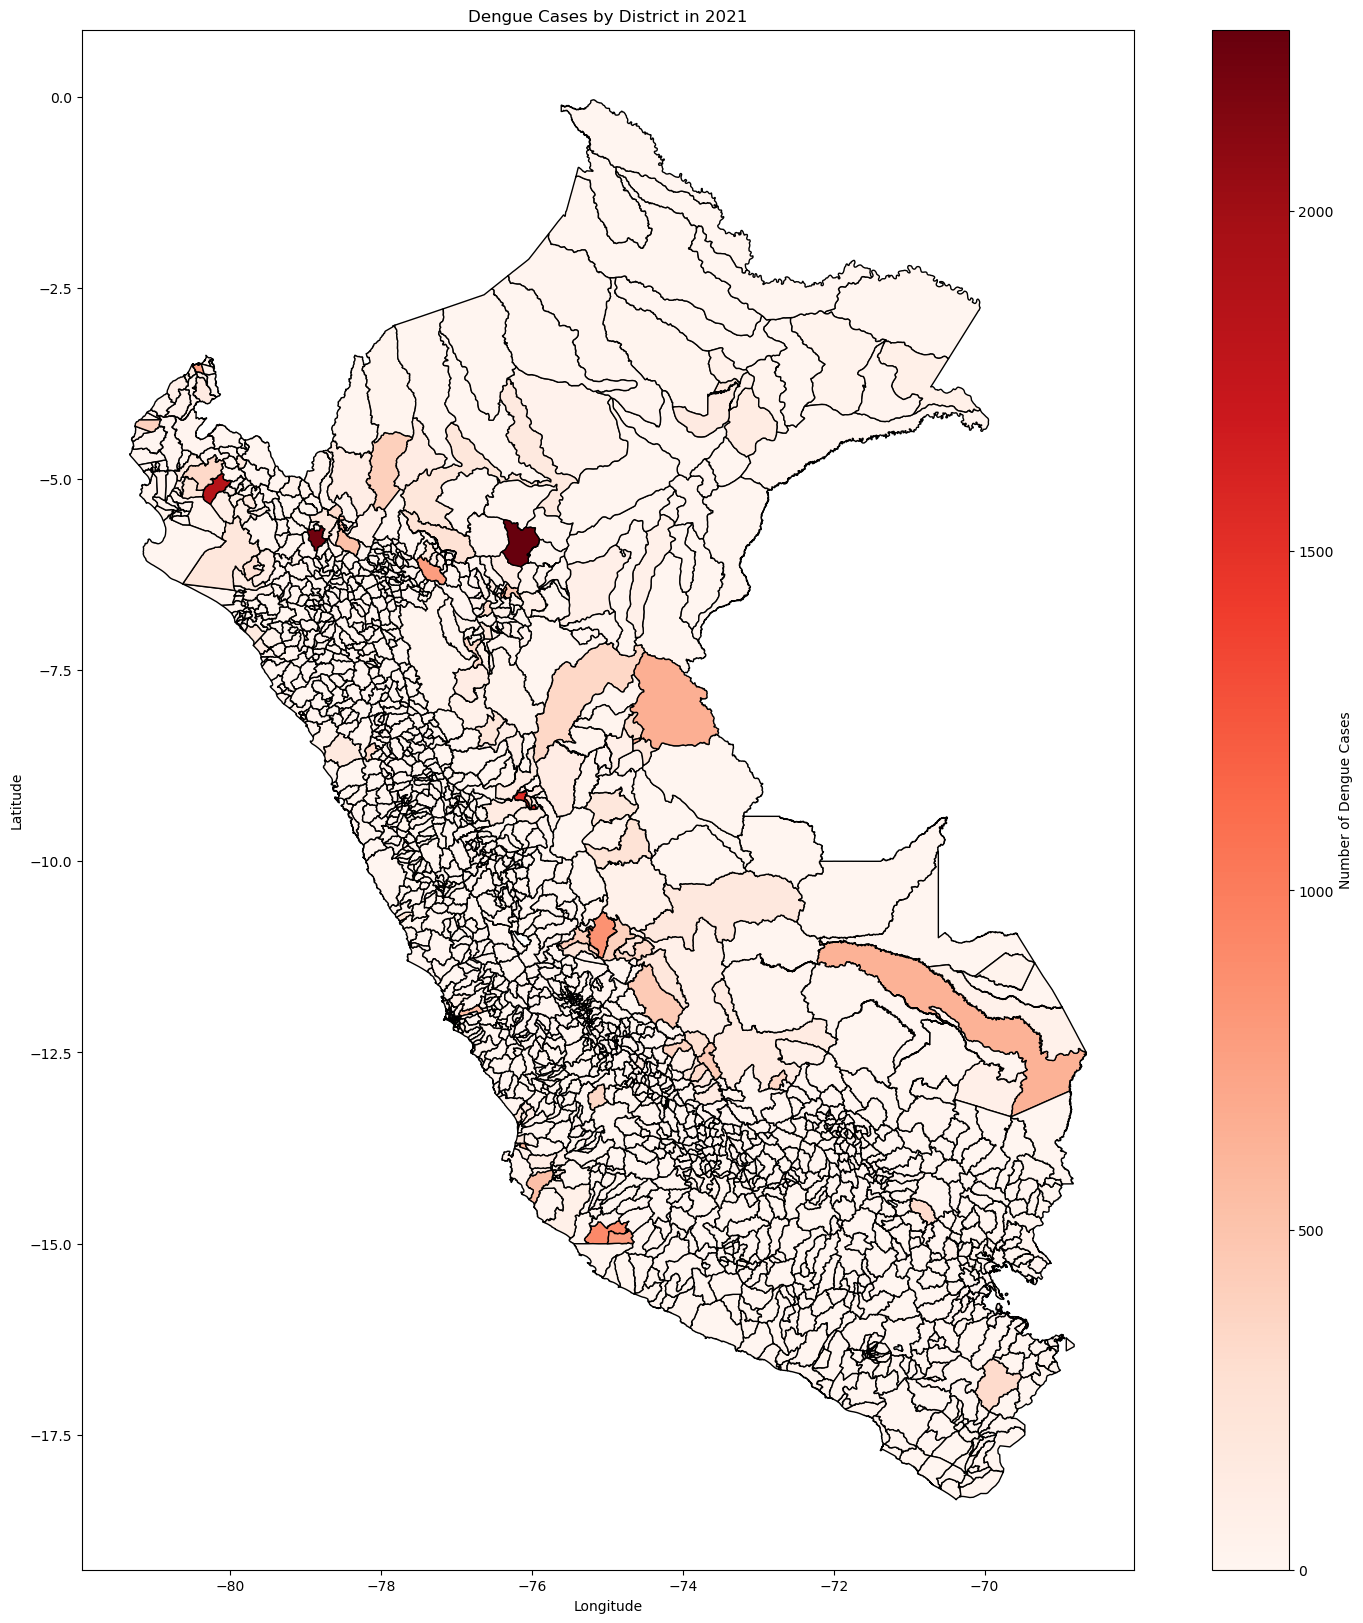

In [107]:
# Plotting  
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  
dpt_shp.plot(column='Casos', cmap='Reds', ax=ax, edgecolor='black',   
              legend=True, legend_kwds={'label': "Number of Dengue Cases", 'orientation': "vertical"},   
              missing_kwds={'color': 'lightgrey', 'label': 'No data'})  

# Add titles and labels  
plt.title('Dengue Cases by District in 2021')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.show()

### 4. Use geopandas to plot cases in 2021 by *province*
We need to use a continuous legens and indicate NA values

In [121]:
# We will load the shapefile again but with another name  
prov_shp = gpd.read_file(r'..\..\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp')  
prov_shp.head

<bound method NDFrame.head of      CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESC

In [123]:
# Aggregate cases by province for the year 2021  
dengue.sort_values(['Provincia', 'Año'], inplace=True)  # Assuming there is a 'Provincia' column  
cases_by_province = dengue[dengue['Año'] == 2021].groupby('Provincia', as_index=False)[['Casos']].sum()  

# Merge the shapefile with the dengue data based on province name  
prov_shp = prov_shp.merge(cases_by_province, left_on='NOMBPROV', right_on='Provincia', how='left')  

# Fill NA values with a specific color (e.g., 0 for no cases)  
prov_shp['Casos'] = prov_shp['Casos'].fillna(0)  # NA values can be treated as 0 or you can leave them as NaN  

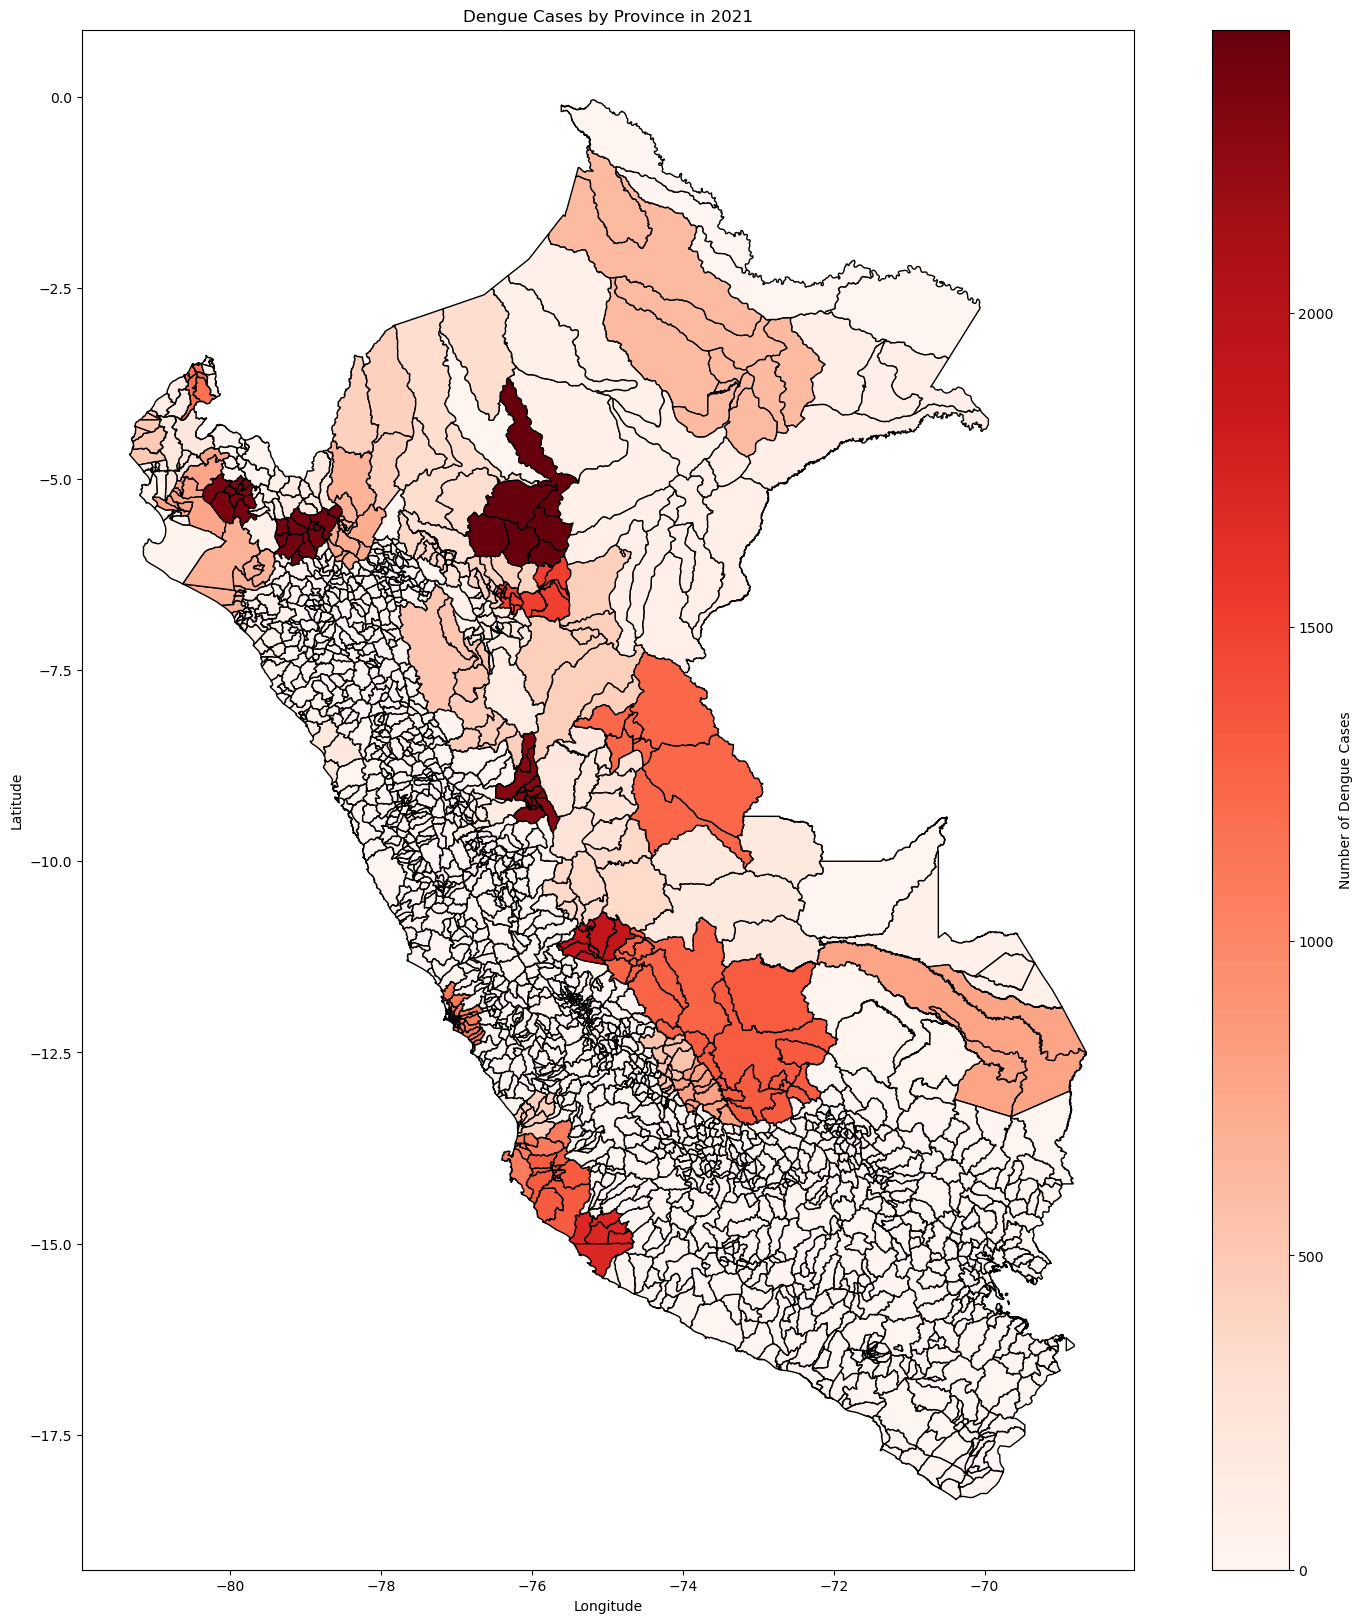

In [125]:
# Plotting  
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  
prov_shp.plot(column='Casos', cmap='Reds', ax=ax, edgecolor='black',   
               legend=True, legend_kwds={'label': "Number of Dengue Cases", 'orientation': "vertical"},   
               missing_kwds={'color': 'lightgrey', 'label': 'No data'})  

# Add titles and labels  
plt.title('Dengue Cases by Province in 2021')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.show()

### 5. Use geopandas to plot cases for all the years by *department*
We need to use subplots for each year and indicate NA values

### 6. Use geopandas to plot cases by the *department* for all 2021 quarters using subplots
We need to do every subplot for each quarter, a categorical legend with 5 bins and indicate NA values